# Clustering

In [2]:
import numpy as np
import random
import sklearn.preprocessing
import pandas as pd
import pyclustertend
movies_data = pd.read_csv("movies/movies.csv",encoding ='latin1')


## 1.1 Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [3]:
categorical_columns = [ # innecesarias para clustering
    "id", 
    "genres",
    "homePage", 
    "productionCompany",
    "productionCompanyCountry",
    "productionCountry", 
    "releaseDate",  
    "actors",      
    "director",
    "actorsPopularity",
    "actorsCharacter",
    "originalTitle",
    "title",
    "originalLanguage",
    "video"
]

df_clustering = movies_data.drop(columns=categorical_columns, errors='ignore')

# Convertir a numérico y eliminar filas con valores no convertibles
df_clustering["castWomenAmount"] = pd.to_numeric(df_clustering["castWomenAmount"], errors="coerce")
df_clustering["castMenAmount"] = pd.to_numeric(df_clustering["castMenAmount"], errors="coerce")

# Eliminar filas con valores nulos después de la conversión
df_clustering = df_clustering.dropna(subset=["castWomenAmount", "castMenAmount"])

# Verificar que ya no haya valores nulos en estas columnas
print(df_clustering["castWomenAmount"].isnull().sum())
print(df_clustering["castMenAmount"].isnull().sum())

print('variables para clustering')
print(df_clustering.columns)


0
0
variables para clustering
Index(['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount',
       'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
       'actorsAmount', 'castWomenAmount', 'castMenAmount'],
      dtype='object')


## 1.2 Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones.

Estadística de Hopkins: 0.0261


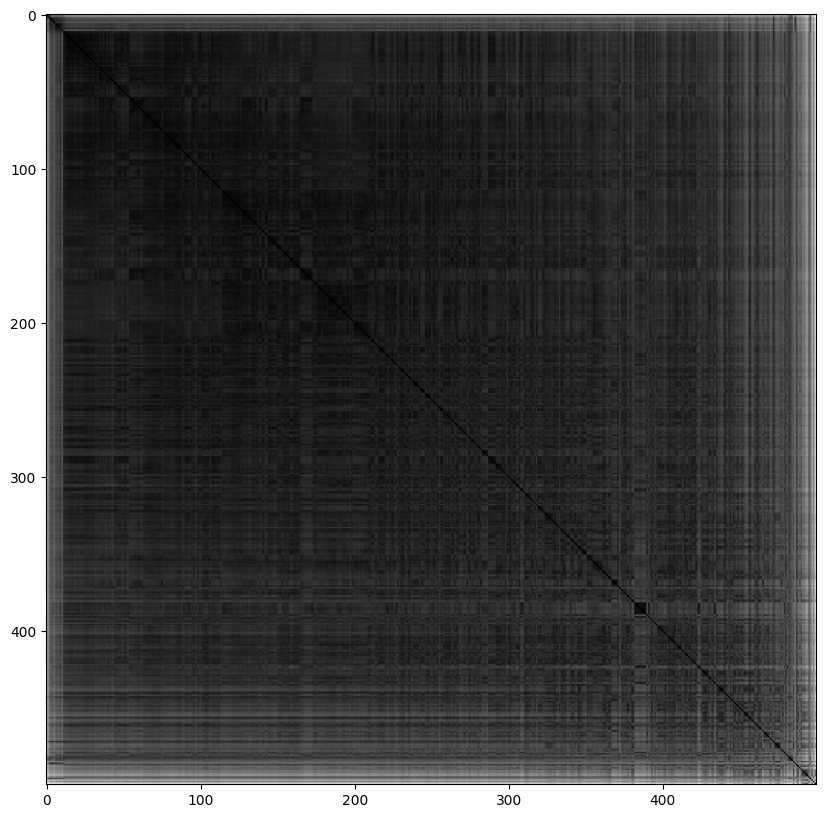

In [4]:
from sklearn.preprocessing import StandardScaler

X = np.array(df_clustering[['budget', 'revenue', 'runtime', 'popularity', 'voteAvg', 'voteCount',
                            'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
                            'actorsAmount', 'castWomenAmount', 'castMenAmount']])

# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Escalar los datos para normalización
X_scale = sklearn.preprocessing.scale(X)

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))

# Imprimir resultado
print(f'Estadística de Hopkins: {hopkins_stat:.4f}')

X_scale = StandardScaler().fit_transform(X)
if X_scale.shape[0] > 500:
    X_sampled = X_scale[random.sample(range(X_scale.shape[0]), 500), :]
else:
    X_sampled = X_scale
pyclustertend.vat(X_sampled)


## 1.3 Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

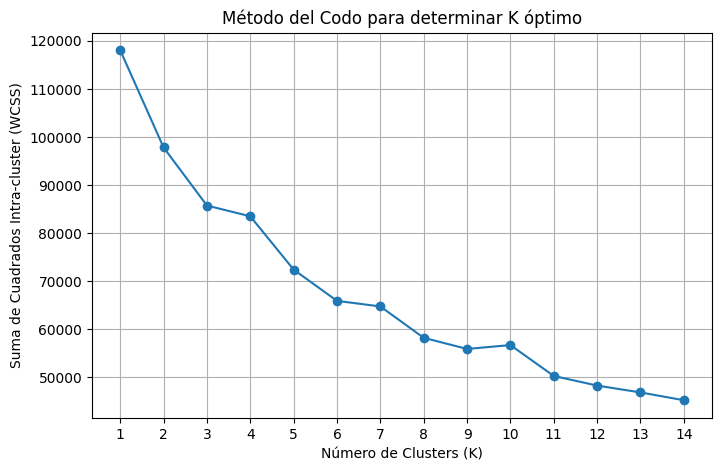

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

num_clusters = range(1, 11)
wcss = []  # Within-Cluster Sum of Squares (Inercia)

# Aplicar K-Means para cada número de clusters
for i in num_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scale)
    wcss.append(kmeans.inertia_)  # Inercia: suma de las distancias intra-cluster

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, wcss, marker='o', linestyle='-')
plt.xticks(num_clusters)
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Suma de Cuadrados Intra-cluster (WCSS)")
plt.title("Método del Codo para determinar K óptimo")
plt.grid()
plt.show()


## 1.4 Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.

In [13]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_clustering["Cluster"] = kmeans.fit_predict(X_scale)

## 1.5 Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

## nterprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las medidas de tendencia central de las variables continuas y las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir